# Activity: Address missing data 


The investor has asked you to provide them with the following data: 
- Companies in the `hardware` industry based in either `Beijing`, `San Francisco`, or `London` 
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries with companies that joined the list after 2020
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a separate map for Europe is also required)



### Import libraries

In [20]:
# Import libraries and modules.

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Load the dataset


In [22]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_companies = pd.read_csv(r"C:\Users\user\Downloads\Unicorn_Companies (1).csv")

**Question: In what year was the oldest company founded?**

[Write your response here. Double-click (or enter) to edit.]

### Data Preprocessing

In order to answer the investor's questions, some data preprocessing steps are required. The first step is to add a new column to the dataframe containing just the year each company became a unicorn company. Call this new column `Year Joined`. 

In [122]:
# Create a new column "Year Joined" from "Date Joined".

df_companies['Date Joined'] = pd.to_datetime(df_companies['Date Joined'])

df_companies.insert(3, 'Year Joined', df_companies['Date Joined'].dt.year)
df_companies[:3]

,Company,Valuation,valuation_num,Year Joined,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,180,2017,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,100,2012,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,100,2018,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."


For each country, you want to calculate the sum of all valuations of companies from that country. However, in order to do this, you'll need to first prepare the data. Currently, the data in the `Valuation` column is a string that starts with a `$` and ends with a `B`. Because this column is not in a numeric datatype, pandas cannot perform mathematical operations on its values. The data in this column needs to be converted to a numeric datatype. 

In this step, define a function called `str_to_num()` that accepts as an argument:

* `x`: a string in the format of the values contained in the `Valuation` column

And returns:

* `x`: an `int` of the number represented by the input string


In [29]:
# Define the `str_to_num()` function

def str_to_num(x):
    x = int(x.strip('$B'))
    return x

Now, use this function to create a new column called `valuation_num` that represents the `Valuation` column as an integer value. To do this, use the series method [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) to apply the `str_to_num()` function to the `Valuation` column.

`apply()` is a method that can be used on a `DataFrame` or `Series` object. In this case, you're using it on the `Valuation` series. The method accepts a function as an argument and applies that function to each value in the series.



In [31]:
# Apply the `str_to_num()` function to the `Valuation` column
# and assign the result back to a new column called `valuation_num`

df_companies.insert(2, 'valuation_num',df_companies['Valuation'].apply(str_to_num))
df_companies[:3]


,Company,Valuation,valuation_num,Date Joined,Year Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,180,2017-04-07,2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,100,2012-12-01,2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,100,2018-07-03,2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."


### Find missing values

The unicorn companies dataset is fairly clean, with few missing values. 

In [34]:
# Find the number of missing values in each column in this dataset

df_companies.isna().sum()



Company              0
Valuation            0
valuation_num        0
Date Joined          0
Year Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

### Review rows with missing values

Before dealing with missing values, it's important to understand the nature of the missing value that is being filled. Display all rows with missing values from `df_companies`. To do this, perform the following three steps:

1. Apply the `isna()` method to the `df_companies` dataframe as you did in the last step. Remember, this results in a dataframe of the same shape as `df_companies` where each value is `True` if its contents are `NaN` and a `False` if its contents are not `NaN`. Assign the results to a variable called `mask`.

In [37]:
# 1. Apply the `isna()` method to the `df_companies` dataframe and assign back to `mask`

mask = df_companies.isnull() 

You're not done yet. You still need to go from this dataframe of Boolean values to a dataframe of just the rows of `df_companies` that contain at least one `NaN` value. This means that you need a way to find the indices of the rows of the Boolean dataframe that contain at least one `True` value, then extract those indices from `df_companies`. 

You can do this using the [`any()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html) method for `DataFrame` objects. This method returns a Boolean `Series` indicating whether any value is `True` over a specified axis.


2. Apply the `any()` method to the Boolean dataframe you created to make a Boolean series where each element in the series represents `True` if a row of the dataframe contains any `True` values and `False` if any row in the dataframe contains any `False` values. Assign the results back to `mask`.

In [39]:
# 2. Apply the `any()` method to `mask` and assign the results back to `mask`

mask = mask.any(axis=1)

3. Because `mask` is now a series of Boolean values, you can use it as a Boolean mask. Apply the Boolean mask to the `df_companies` dataframe to return a filtered dataframe containing just the rows that contain a missing value. Assign the results to a variable called `df_missing_rows`.

In [41]:
# 3. Apply `mask` as a Boolean mask to `df_companies` and assign results to `df_missing_rows`

df_missing_rows = df_companies[mask]
df_missing_rows[:5]

,Company,Valuation,valuation_num,Date Joined,Year Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,32,2021-07-20,2021,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,4,2020-05-26,2020,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,3,2021-05-17,2021,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,3,2019-07-22,2019,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,3,2021-06-21,2021,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."


## Step 3: Model building

Think of the model you are building as the completed dataset, which you will then use to inform the questions the investor has asked of you.  

### Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and imputing other values in their place. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

Here, you will try both. 

To compare the the effect of different actions, first store the original number of values in a variable. Create a variable called `count_total` that is an integer representing the total number of values in `df_companies`. For example, if the dataframe had 5 rows and 2 columns, then this number would be 10.

In [45]:
# Store the total number of values in a variable called `count_total`

count_total = df_companies.size
count_total

12888

Now, remove all rows containing missing values and store the total number of remaining values in a variable called `count_dropna_rows`.

In [47]:
# Drop the rows containing missing values, determine number of remaining values 
count_dropna_rows = df_companies.dropna().size
count_dropna_rows

12684

Now, remove all columns containing missing values and store the total number of cells in a variable called `count_dropna_columns`.

In [49]:
# Drop the columns containing missing values, determine number of remaining values

count_dropna_columns = df_companies.dropna(axis=1).size
count_dropna_columns

10740

Next, print the percentage of values removed by each method and compare them.

In [51]:
# Print the percentage of values removed by dropping rows.

print(f'Rows:{(count_total-count_dropna_rows)/count_total:.2%}')

# Print the percentage of values removed by dropping columns.

print(f'Columns:{(count_total-count_dropna_columns)/count_total:.2%}')

Rows:1.58%
Columns:16.67%


Now, practice the second method: imputation. Perform the following steps:

1. Use the [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) dataframe method to fill each missing value with the next non-NaN value in its column. Assign the results to a new dataframe called `df_companies_backfill`.
 

2. Show the rows that previously had missing values.

In [108]:
# 1. Fill missing values using the 'fillna()' method, back-filling

df_companies_backfill = df_companies.bfill()

# 2. Show the rows that previously had missing values

df_companies_backfill.iloc[df_missing_rows.index]

,Company,Valuation,valuation_num,Date Joined,Year Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,32,2021-07-20,2021,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,4,2020-05-26,2020,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,3,2021-05-17,2021,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,3,2019-07-22,2019,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,3,2021-06-21,2021,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2,2021-09-27,2021,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2,2021-09-23,2021,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
629,LinkSure Network,$1B,1,2015-01-01,2015,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve..."
811,Carousell,$1B,1,2021-09-15,2021,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,1,2021-06-01,2021,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."


## Step 4: Results and evaluation

Now that you've addressed your missing values, provide your investor with their requested data points.

### Companies in the `Hardware` Industry

Your investor is interested in identifying unicorn companies in the `Hardware` industry in the following cities: `Beijing`, `San Francisco`, and `London`. They are also interested in companies in the `Artificial intelligence` industry in `London`. 

1. Write a selection statement that extracts the rows that meet these criteria. This task requires complex conditional logic. 


2. Apply the mask to the `df_companies` dataframe and assign the result to a new variable called `df_invest`.

In [57]:
# 1. Create a Boolean mask using conditional logic
# 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`

df_invest = df_companies[(
                        (df_companies['Industry'] == 'Hardware') & (
                            (df_companies['City'] == 'London') | (df_companies['City'] =='Beijing') | (df_companies['City'] =='San Francisco')
                            )
                        )|(
                        (df_companies['Industry'] == 'Artificial intelligence') & (df_companies['City'] == 'London')
                        )]

df_invest


,Company,Valuation,valuation_num,Date Joined,Year Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
36,Bitmain,$12B,12,2018-07-06,2018,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ..."
43,Global Switch,$11B,11,2016-12-22,2016,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc..."
147,Chipone,$5B,5,2021-12-16,2021,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H..."
845,Density,$1B,1,2021-11-10,2021,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors"
873,BenevolentAI,$1B,1,2015-06-02,2015,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management
923,Geek+,$1B,1,2018-11-21,2018,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War..."
1040,TERMINUS Technology,$1B,1,2018-10-25,2018,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK"
1046,Tractable,$1B,1,2021-06-16,2021,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ..."


### List of countries by sum of valuation

For each country, sum the valuations of all companies in that country, then sort the results in descending order by summed valuation. Assign the results to a variable called `national_valuations`.

In [60]:
# Group the data by`Country/Region`

national_valuations = (df_companies.groupby(by='Country/Region')
                        .sum(numeric_only=True)[['valuation_num']]
                        .sort_values('valuation_num', ascending=False)
                        .rename({'valuation_num':'Total Valuation ($B)'}, axis=1)
                        .reset_index()
                       )

# Print the top 15 values of the DataFrame.

national_valuations[:15]

,Country/Region,Total Valuation ($B)
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


### Filter out top 4 outlying countries

Use this grouped and summed data to plot a barplot. However, to meet the needs of your stakeholder, you must first remove the United States, China, India, and the United Kingdom. Remove these countries from `national_valuations` and reassign the results to a variable called `national_valuations_no_big4`.

In [63]:
# Remove outlying countries

national_valuations_no_big4 = national_valuations[4:-1]
national_valuations_no_big4[:5]

,Country/Region,Total Valuation ($B)
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


### BONUS CONTENT: Alternative approach (optional)

You can also use `isin()` to create a Boolean mask to filter out specific values of the `Country/Region` column. In this case, this process is longer and more complicated than simply using the iloc[] statement. However, there will be situations where this is the most direct approach. 
    
How could you use `isin()` and your knowledge of pandas conditional operators and Boolean masks to accomplish the same task?


In [65]:
# (Optional) Use `isin()` to create a Boolean mask to accomplish the same task

national_valuations_no_big4 = (national_valuations[~ national_valuations['Country/Region']
                              .isin(['United States', 'China', 'India', 'United Kingdom'])]
                              ) 
national_valuations_no_big4[:5]

,Country/Region,Total Valuation ($B)
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49


### Create barplot for top 20 non-big-4 countries

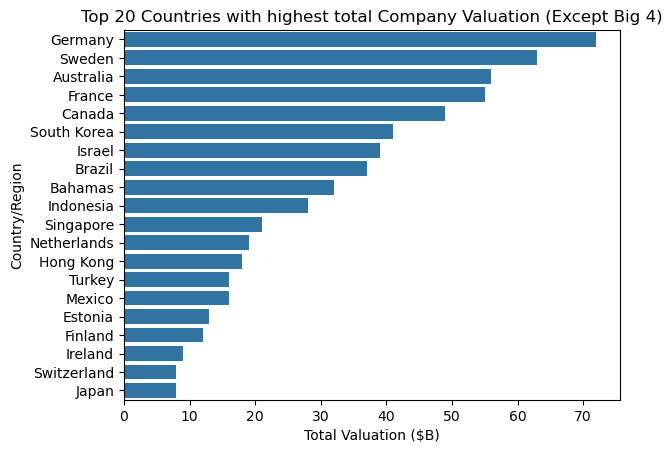

In [67]:
# Create a barplot to compare the top 20 countries with highest company valuations.

sns.barplot(y=national_valuations_no_big4['Country/Region'].iloc[:20], x=national_valuations_no_big4['Total Valuation ($B)'])
# Show the plot.
plt.title(r'Top 20 Countries with highest total Company Valuation (Except Big 4)')
plt.show()


### Plot maps

Your investor has also asked for a global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a.k.a. "big-four countries").

You have learned about using [`scatter_geo()`](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo) from the `plotly.express` library to create plot data on a map. Create a `scatter_geo()` plot that depicts the total valuations of each non-big-four country on a world map, where each valuation is shown as a circle on the map, and the size of the circle is proportional to that country's summed valuation.

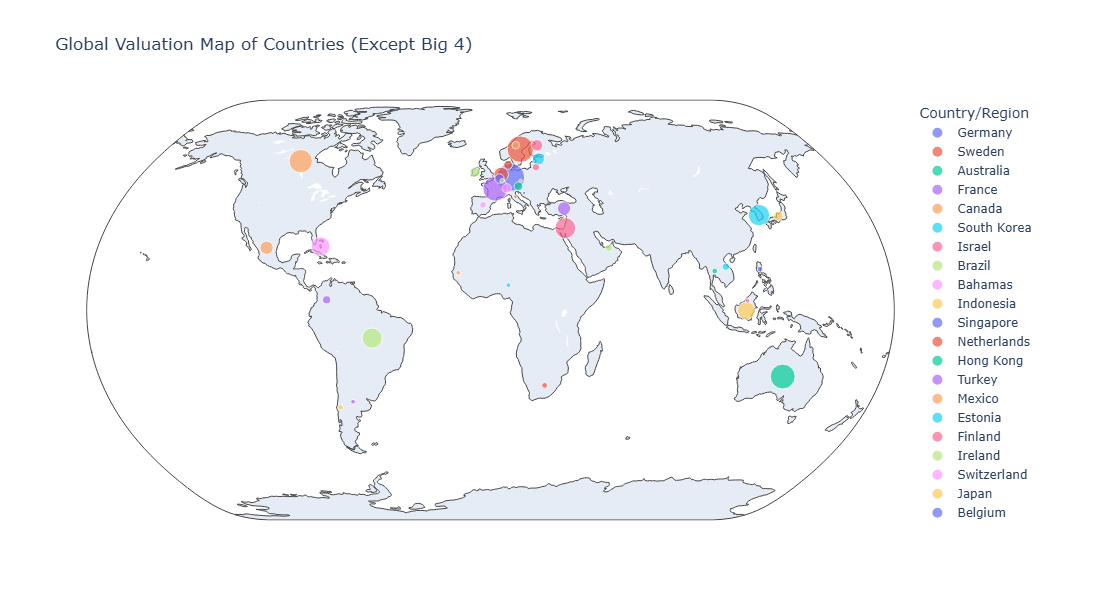

In [128]:
# Plot the sum of valuations per country.

fig = px.scatter_geo(national_valuations_no_big4,
                     locations='Country/Region',
                     size='Total Valuation ($B)',
                     color='Country/Region',
                     title='Global Valuation Map of Countries (Except Big 4)',
                     projection='natural earth',
                     locationmode='country names',
                     width=900, height=600
                    )

fig.show()

**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

